# Data description

In [1]:
import numpy as np
import pandas as pd

from ipywidgets import interact
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

init_notebook_mode(connected=True)
cf.go_offline(connected=True)
cf.set_config_file(theme="pearl")
pd.set_option('display.max_columns', 30)
%matplotlib inline

In [2]:
df = pd.read_csv("Life_Expectancy.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- status: developing or developed country
- life_expectancy: life expectancy in age
- adult_mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant_deaths: Number of Infant Deaths per 1000 population
- alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- expenditure_on_gdp: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- hepatitis_b: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under_five_deaths: Number of under-five deaths per 1000 population
- polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- expenditure_on_goverment: General government expenditure on health as a percentage of total government expenditure (%)
- diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- population: Population of the country
- thinness_10_19: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness_5_9: Prevalence of thinness among children for Age 5 to 9(%)
- HDI: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- schooling: Number of years of Schooling(years)

# Data cleaning
## Rename columns

There are typos in columns' name need to be corrected and the spaces in front/ behind of the feature name are removed.

In [4]:
df.columns = ["country","year","status","life_expectancy","adult_mortality","infant_deaths","alcohol","expenditure_on_gdp",
             "hepatitis_b","measles","BMI","under_five_deaths","polio","expenditure_on_government","diphtheria","HIV/AIDS",
             "GDP","population","thinness_10_19","thinness_5_9","HDI","schooling"]

## Descriptive statistics

In [5]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,expenditure_on_gdp,hepatitis_b,measles,BMI,under_five_deaths,polio,expenditure_on_government,diphtheria,HIV/AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Based on the feature description:

- **infant_deaths, measles, under_five_deaths** are measured based on 1000 population. Thus, it is impossible that the maximum values are more than 1000.
- **expenditure_on_gdp** is measured based on GDP, their values should be less than 100. Yet, the 75% percentile and max show that they far above 100.
- **population**: min is 34 persons
- max BMI is 87

## infant_deaths, measles, and under_five_deaths column

In [6]:
np.sum(df[["infant_deaths","measles","under_five_deaths"]]>= 1000)

infant_deaths         14
measles              525
under_five_deaths     16
dtype: int64

Since the number of absurd record in measles is quite high, we decide to compare the data with the WHO database and we realize that:
- **under_five_deaths** is recorded as the number of under-five deaths (in thousands).
- **measles** record the count of confirm cases of measles.
- **infant_deaths** shows the number of infant_deaths (per 1000 live births). There are many entries with value of 0, which is indicates missing values.

Based on the new information, we decide:
- **Drop Infant deaths.** Since there is no completely recored data that aligned with our dataset.
- **Keep under_five_deaths, measles** and update their name to avoid confusion.

In [7]:
df.drop(["infant_deaths"],axis=1,inplace=True)

In [8]:
df = df.rename(columns={"under_five_deaths":"under_five_deaths_thousands", "measles": "measles_case"})

## Expenditure on GDP

As explained in dataset description, the expenditure on GDP is Expenditure on health as a percentage of Gross Domestic Product per capita(%). However, as in descriptive statistic, the mean of this column is over 700 which can't be right. Furthermore, we can not find any reliable source on how the expenditure on GDP is calculated or collected in this dataset, therefore, this column is removed.

In [9]:
df.drop(["expenditure_on_gdp"],axis=1,inplace=True)

## Population and BMI

For both population and BMI, there are some abnormal values and they can be treated as outlier and handled later.

## Correlation matrix

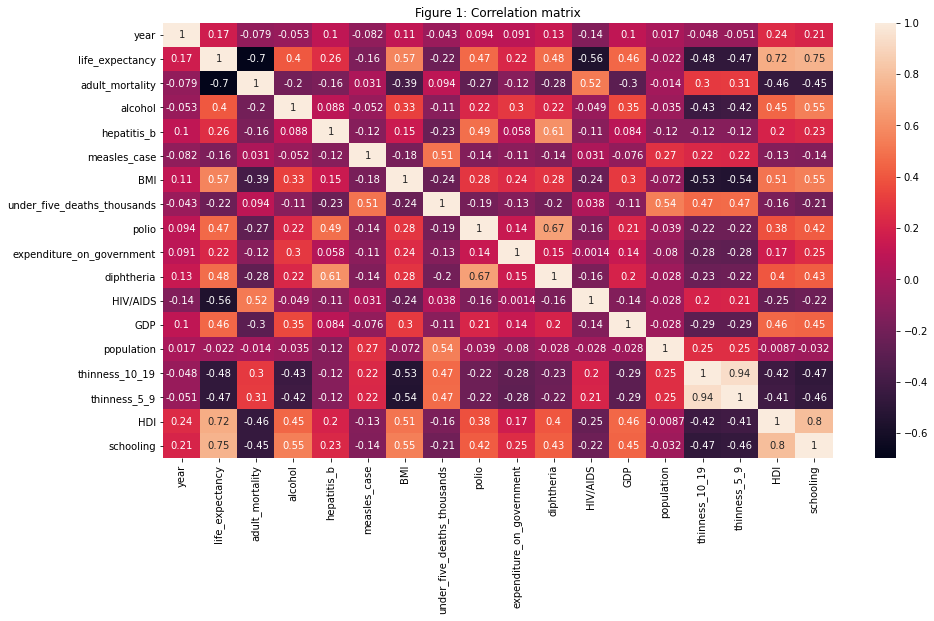

In [10]:
plt.figure(figsize=(15,8))
plt.title("Figure 1: Correlation matrix")
sns.heatmap(df.corr(),annot=True);

### Correlation between life expectancy and other features

According to correlation matrix, other features, except population, is somehow correlated with our target column. Therefore, we will remove the population column.

In [11]:
df.drop(["population"],axis=1,inplace=True)

### Multi correlation

In [12]:
def filter_df_corr(df, threshold):
    '''
    Obj: Find the features that are correlated based on user input threshold
    Inputs: df: dataframe of feature to check correlation
            threshold: Threshold of correlation to determine how to choose column.
    Output: dataframe that only includes correlated features and their score
            list of column name to drop
    '''
    # Creates Correlation Matrix
    corr_matrix = df.corr()

    # Iterates through Correlation Matrix Table to find correlated columns
    drop_cols = []
    n_cols = len(corr_matrix.columns)
    f1 = []
    f2 = []
    corr_ = []
    for i in range(n_cols):
        for k in range(i+1, n_cols):
            val = corr_matrix.iloc[k, i]
            col = corr_matrix.columns[i]
            row = corr_matrix.index[k]
            if abs(val) >= threshold:
                # Append correlated pair for later dataframe construction
                f1.append(col)
                f2.append(row)
                corr_.append(val)
                drop_cols.append(col)
    # 
    drop_cols = set(drop_cols)
    # Create dataframe that only include correlated feature and their correlation
    df_result = pd.DataFrame(list(zip(f1, f2, corr_)), 
               columns =['Feature1', 'Feature2', 'Correlation']) 
    
    return df_result, drop_cols

In [13]:
result, col = filter_df_corr(df.drop(["life_expectancy"],axis=1), 0.8)

In [14]:
result

,Feature1,Feature2,Correlation
0,thinness_10_19,thinness_5_9,0.939102
1,HDI,schooling,0.800092


Based on the result, we can see that:
- thinness_5_9 is highly correlated with thinness_10_19. If children are in bad nutrition condition during 5 to 9 years old, they are more likely thinness from 10 to 19, too.
- HDI and schooling also have high correlation.

To reduce the complexity of dataset and multi correlation, thinness_5_9 and schooling are removed.

In [15]:
df.drop(["thinness_5_9", "schooling"], axis=1,inplace=True)

## Missing values

<AxesSubplot:>

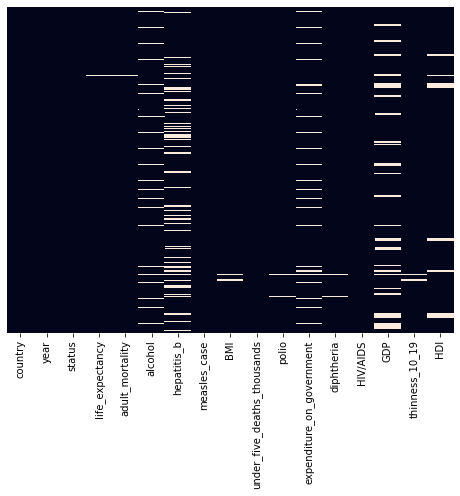

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

<AxesSubplot:>

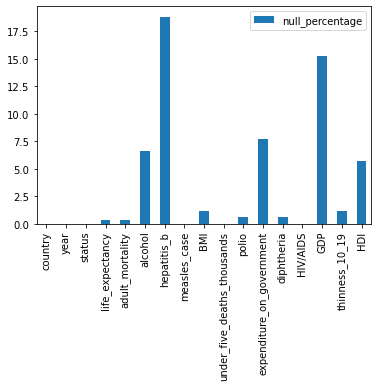

In [17]:
a = pd.DataFrame(np.round(df.isnull().sum()/len(df)*100,2), columns=["null_percentage"])
a.plot(kind="bar", )

There are quite many missing values, especially for the 3 columns: GDP and hepatitis_b (over 15%)

### GDP and hepatitis_b

Since the correlation between hepatitis_b is not high, we will drop this column.

In [18]:
df.drop(["hepatitis_b"], axis=1,inplace=True)

In [19]:
a = df.GDP.isnull()
b = pd.concat([df.country, a], axis=1)
c = b.groupby("country").sum()
d = c[c.GDP!=0]

In [20]:
plt.figure(figsize=(10,8))
d.iplot(kind="bar")

<Figure size 720x576 with 0 Axes>

In [21]:
d[d.GDP>10].shape

(26, 1)

There are 26 countries that are missing GDP information of more than 10 years which are approximately 400 rows. Even if we fill other missing value with the country's GDP mean, the amount of row recovered is insignificant (48 rows on 2500 rows). Therefore, we will drop all the rows that missing GDP value.

In [22]:
df.dropna(subset=["GDP"], inplace=True)

<AxesSubplot:>

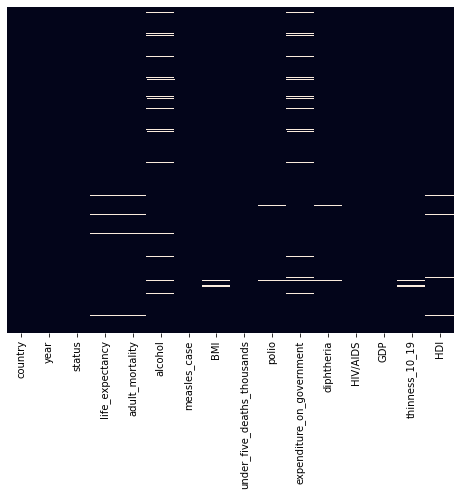

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [24]:
df.isnull().sum()

country                          0
year                             0
status                           0
life_expectancy                  5
adult_mortality                  5
alcohol                        158
measles_case                     0
BMI                             24
under_five_deaths_thousands      0
polio                           11
expenditure_on_government      158
diphtheria                      11
HIV/AIDS                         0
GDP                              0
thinness_10_19                  24
HDI                              6
dtype: int64

The amount of missing value is not much left.

### Alcohol and expenditure on government

In [25]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'alcohol', 'measles_case', 'BMI', 'under_five_deaths_thousands',
       'polio', 'expenditure_on_government', 'diphtheria', 'HIV/AIDS', 'GDP',
       'thinness_10_19', 'HDI'],
      dtype='object')

In [26]:
al = df.groupby("country").alcohol.min().isnull()
ex = df.groupby("country").expenditure_on_government.min().isnull()
print(f"There only {al[al==1].sum()} country that miss alcohol values over 16 years: {al[al==1].index.values}")
print(f"There only {ex[ex==1].sum()} country that miss expenditure_on_government values over 16 years: {ex[ex==1].index.values}")

There only 2 country that miss alcohol values over 16 years: ['Palau' 'South Sudan']
There only 1 country that miss expenditure_on_government values over 16 years: ['Somalia']


Palau and Somalia only have 1 and 3 entries recorded, therefore, they can be dropped. South Sudan prohibits using alcohol, thus the missing values can be filled with 0.

In [27]:
df = df[(df.country!="Somalia")&(df.country!="Palau")]

In [28]:
df.loc[df.country=="South Sudan", "alcohol"]=0

For other countries with missing values in alcohol columns, they are filled with mean.

In [29]:
#define a function to fill the missing value by mean
def fill_na_by_country(column):
    
    mean_fill = df.groupby(["country"])[column].mean().to_dict()
    
    for i in mean_fill.keys():
        df.loc[(df[column].isnull()) & (df.country == i), column] = mean_fill[i]

In [30]:
fill_na_by_country(column="alcohol")
fill_na_by_country(column="expenditure_on_government")

### Other columns

In [31]:
df.isnull().sum()

country                         0
year                            0
status                          0
life_expectancy                 4
adult_mortality                 4
alcohol                         0
measles_case                    0
BMI                            24
under_five_deaths_thousands     0
polio                          11
expenditure_on_government       0
diphtheria                     11
HIV/AIDS                        0
GDP                             0
thinness_10_19                 24
HDI                             3
dtype: int64

Since our target is life_expectancy, missing values in this column will affect the later part. Rows with missing value of life expectancy are dropped.

In [32]:
df.dropna(subset=["life_expectancy"], inplace=True)

The remain missing values can be fill with column mean. If the information is missing for the whole 16 years, they will be dropped instead.

In [33]:
null_columns = list(df.isnull().sum()[df.isnull().sum() != 0].index)

for i in null_columns:
    #check if there any countries that miss values over 16 years
    null_countries = df.groupby("country")[i].min().isnull() 
    #get the name of the null countries
    null_countries = list(null_countries[null_countries==1].index)
    #find the index of null countries in the original data
    null_index = df[np.isin(df.country, null_countries)].index
    
    df.drop(null_index, inplace=True)

In [34]:
current_null = df.isnull().sum()[df.isnull().sum() != 0]

for i in current_null.index:
    fill_na_by_country(column=i)

In [35]:
df.shape

(2458, 16)

# EDA
## Distribution

D:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



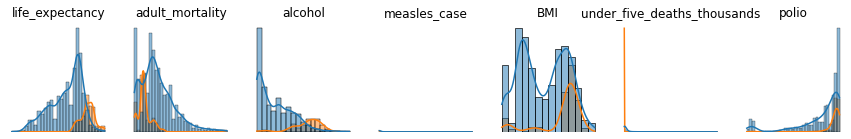

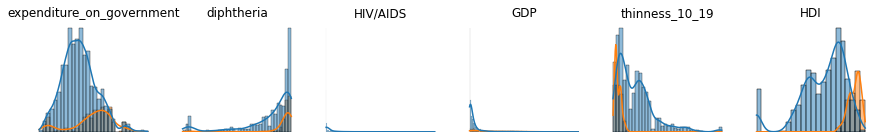

In [36]:
plt.subplots(1,7,figsize=(15,2))

for i,j in enumerate(df.columns[3:10]):
    plt.subplot(171+i)
    sns.histplot(data=df, x=df[j],kde=True,hue="status",legend=False)
    plt.title(df.columns[3:10][i])
    plt.axis("off")
    
plt.subplots(1,6,figsize=(15,2))

for i,j in enumerate(df.columns[10:]):
    plt.subplot(161+i)
    sns.histplot(data=df, x=df[j],kde=True,hue="status",legend=False)
    plt.title(df.columns[10:][i])
    plt.axis("off")

Except the "expenditure_on_government" which is quite normally distributed, most of the features are pretty skewed, having long_tail either on the left or right. However, we supposed that those values on the tails may be informative. Thus, we did not remove any of those at this step.

Some other observations:

- Most of **Developed** countries: having **longer** "life_expectancy", consuming **more** "alcohol", having **higher** "BMI index", spending **more** on "heathcare" and having higher "HDI" index.
- In contrast, most **Developing** country having **higher** "adult_mortality", "thinnesss" among children aging from 10 to 19.

The four features "mealses_case", "under_five_deaths_thousands", "HIV/AIDS" and "GDP" are considerably skewed. We might need to investigate those features further.

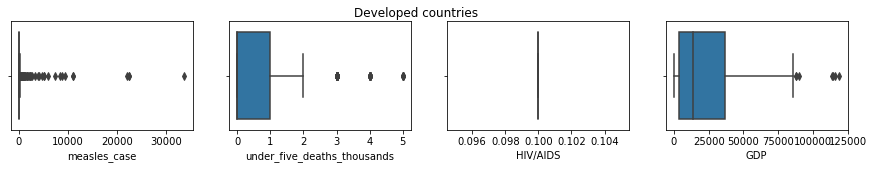

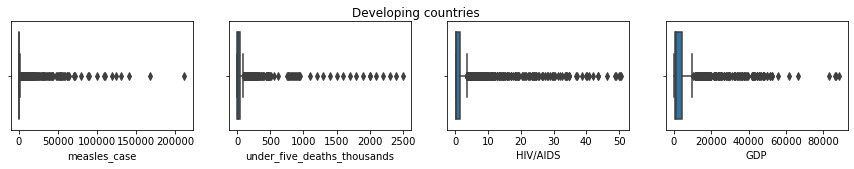

In [37]:
plt.subplots(1,4,figsize=(15,2))
plt.suptitle("Developed countries")
for i,j in enumerate(["measles_case","under_five_deaths_thousands","HIV/AIDS","GDP"]):
    plt.subplot(141+i)
    sns.boxplot(data=df, x=df[df.status=="Developed"][j],hue="status")
    
plt.subplots(1,4,figsize=(15,2))
plt.suptitle("Developing countries")
for i,j in enumerate(["measles_case","under_five_deaths_thousands","HIV/AIDS","GDP"]):
    plt.subplot(141+i)
    sns.boxplot(data=df, x=df[df.status=="Developing"][j],hue="status")

From the above figures, we can see:
- "measles_case","under_five_deaths_thousands" and "HIV/AIDS" in developing countries are significanly higher than Developed countries. Yet, GDP in "developed" countries is considerably higher. 
- Another noticable point is: most abnormal (outliers) values beloing to "under_five_deaths_thousand", "HIV/AIDS" and "GDP" are in "developing" countries, except the measles_case.

## Related_factors over years

In [38]:
def plot_trend(trend="mean"):
    if trend=="mean":
        plt.subplots(1,7,figsize=(15,2))

        for j,i in enumerate(df.columns[3:10]):
    
            plt.subplot(171 + j)
            t = df.groupby(["year","status"])[i].mean().unstack()
            plt.plot(t.index,t.Developed,c="r",label="Developed",)
            plt.plot(t.index,t.Developing,label="Developing")
            plt.title(df.columns[3:10][j])
            plt.ylabel(ylabel=None)
            plt.axis("off")
    
        plt.subplots(1,6,figsize=(15,2))

        for j,i in enumerate(df.columns[10:]):
            plt.subplot(161 + j)
            t = df.groupby(["year","status"])[i].mean().unstack()
            plt.plot(t.index,t.Developed,c="r",label="Developed")
            plt.plot(t.index,t.Developing,label="Developing")
            plt.title(df.columns[10:][j])
            plt.axis("off")

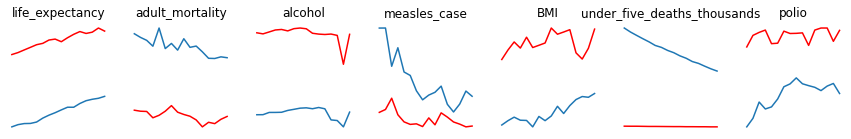

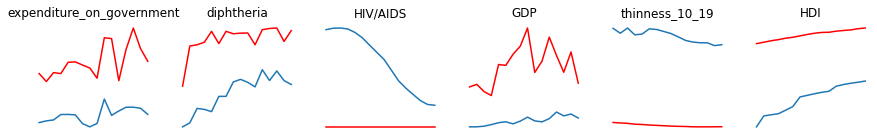

In [39]:
plot_trend()

From the above figure:
- It confirms our 1st plot in our EDA plot, ex. citizen in Developed countries have longer life_expectancy than Developing countries and so do in other features.
- Average "life_expectancy"  and "HDI" in both countries group improve year by year, indicating that more attention was placed on healthcare which help lengthen life_expectancy.
- The decrease in other indicators about mortality and deseases also confirms the enhancement in healthcare such as: adult_mortality, measles_case, under_five_deaths_thousands, HIV/AIDS, and thinnesss_10_19.
- Alcohol_consumption generally remains unchanged despite a significant drop in the period 2012 - 2014

# Preprocessing
## Encoding and scaling
- The country and year columns are not contributing to the model applying, they are dropped. 
- The status column is a categorical feature, it is encoded to 0 and 1 value, which 0 indicates developing and 1 is developed.
- Separate feature and target columns to X and y.
- The working data includes a lot of outliers, therefore, robust scaler is used to minimize the impact of these outliers.

In [40]:
df.drop(["year", "country"], axis=1, inplace=True)

In [41]:
df.status = df.status.map({"Developing":0, "Developed":1})

In [42]:
X = df.drop("life_expectancy", axis=1)
y = df.life_expectancy

In [43]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

## Feature selection

In [44]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X_scaled,y)
mi

array([0.21433748, 1.30452511, 0.38878599, 0.12990387, 0.63673686,
       0.43314794, 0.32280782, 0.27955392, 0.31524082, 0.54697474,
       0.41207395, 0.84677161, 1.00638973])

Among features, we will only select feature with mutual information score greater than 0.2. Any other feature with lower score is removed and considered as not having contribution to the model.

In [45]:
print(f'Number of selected feature: {len(np.where(mi>=0.15)[0])}')
X_selected = X_scaled[:, np.where(mi>=0.15)[0]]

Number of selected feature: 12


## Train test split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.2,random_state=5)

# Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Baseline score

In [48]:
pipe = Pipeline([('classifier', LinearRegression())])

param = [
    {'classifier':[LinearRegression(), SVR(),DecisionTreeRegressor(random_state=5)]}]

grid = GridSearchCV(pipe, param_grid=param, cv=5)
grid.fit(X_train, y_train)

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best score: {grid.best_score_:.2f}\n")

Best params:
{'classifier': DecisionTreeRegressor(random_state=5)}

Best score: 0.92



Based on the cross validation scores, without any tunning, we found that decision tree has done the best job with score of 0.92. We are attempting to do feature engineering, model tunning and resemble algorithms with the purpose of getting the score better than 0.92.

## Linear Assumption

In [49]:
from sklearn.metrics import mean_squared_error

Mean Squared Error is used as evaluation metric since it is sensitive to outliers, therefore the difference will be clearly showed.

In [50]:
result_regression = []

In [51]:
def table(l = result_regression):
    df = pd.DataFrame(l)
    return df.drop_duplicates()

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
train_score=lr.score(X_train,y_train)
test_score=lr.score(X_test,y_test)

result_regression.append({"model": "LinearRegression(no_tunning)", "train_score": train_score, "test_score": test_score, 
                         "mses":mean_squared_error(y_test,y_pred)})

In [53]:
table()

,model,train_score,test_score,mses
0,LinearRegression(no_tunning),0.804745,0.812918,17.326209


The training score is around 0.8, and a bit overfitting, we will try to improve the train_score before solving over_fitting problems. To improve the training score, we test the seven linear regressions assumptions.

In [54]:
def residual(model,features,label):
    '''
    Obj: calculates the residual of an input model
    Inputs: model: implementation model
            features: features data 
            label: target label of data
    Output: dataframe includes actual, predicted value and the residual
    '''
    model.fit(features,label)
    y_pred = model.predict(features)
    
    df_result = pd.DataFrame({"Actual":label,"predicted":y_pred})
    df_result["residual"]=(df_result["Actual"])-(df_result["predicted"])
    
    return df_result

In [55]:
residual(lr,X_train,y_train).head()

,Actual,predicted,residual
1610,75.4,70.494184,4.905816
1285,82.0,82.686423,-0.686423
2503,47.1,37.007750,10.092250
2838,67.2,69.648143,-2.448143
1774,58.0,48.379909,9.620091


### Linearity testing

In [56]:
def test_linearity(model,feature,label):
    '''
    Obj: Plotting the linearity of data
    Inputs: model: implementation model
            features: features data 
            label: target label of data
    Output: Figure that show the linearity
    '''
    
    df_result=residual(model,feature,label)
    
    sns.lmplot(x="Actual",y="predicted",data=df_result,fit_reg=False)
    cord=np.arange(df_result.min().min(),df_result.max().max())
    plt.plot(cord,cord,"g--",linewidth=3)
    plt.title("Linearity")
    plt.show()

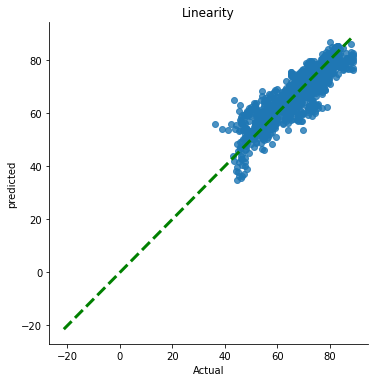

In [57]:
test_linearity(lr,X_train,y_train)

Based on the plot, we can try transforming the data to see if it can help improve the score.

**Polynomial processing**

In [58]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([("poly", PolynomialFeatures(degree=2)),
                 ("lr", LinearRegression())])

param = {"poly__degree":[2,3,4]}

grid = GridSearchCV(pipe, param_grid=param,n_jobs=-1)
grid.fit(X_train, y_train)

best_degree = grid.best_params_["poly__degree"]
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

Best parameters: {'poly__degree': 2}
Best cross-validation score: 0.91



In [59]:
pipe_best = Pipeline([("poly", PolynomialFeatures(degree=best_degree)),
                 ("lr", LinearRegression())])
pipe_best.fit(X_train,y_train)

y_pred = pipe_best.predict(X_test)
train_score=pipe_best.score(X_train,y_train)
test_score=pipe_best.score(X_test,y_test)

result_regression.append({"model": "LinearRegression (2 degree)", "train_score": train_score, "test_score": test_score, 
                         "mses":mean_squared_error(y_test,y_pred)})

In [60]:
table()

,model,train_score,test_score,mses
0,LinearRegression(no_tunning),0.804745,0.812918,17.326209
1,LinearRegression (2 degree),0.926290,0.907635,8.554153


We can clearly see that by transforming the data to polynomial with 2 degree, it significantly improves the score.

### Normality testing

In [61]:
from statsmodels.stats.diagnostic import normal_ad

def check_normality(model,features,label,p_value_threshold=0.05):
    '''
    Obj: Plotting the normality of data
    Inputs: model: implementation model
            features: features data 
            label: target label of data
            p_value_threshold: threshold to determine the normality
    Output: Figure that show the normality
    '''
    
    df_result=residual(model,features,label)
    p_value=normal_ad(df_result["residual"])[1]
    print(f"p-value from the anderson-test :{p_value}")
    if p_value<p_value_threshold:
        print("The residuals are not normally distributed")
    else:
        print("The rediduals are normally distributed")
    sns.histplot(df_result["residual"],kde=True)
    plt.show()

p-value from the anderson-test :0.0
The residuals are not normally distributed


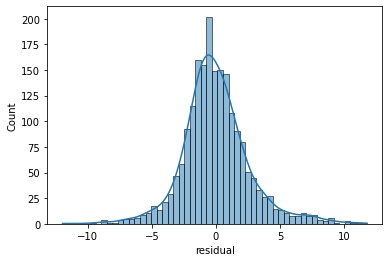

In [62]:
check_normality(pipe_best,X_train,y_train,p_value_threshold=0.05)

According to Anderson_test, the residuals are not normally distributed. However, by investigating the plot, we see that the residuals are approximately normally distributed (except some left skewness). We may need to remove some outliers/long_tailed values. Yet, we suppose that those values are useful.

### Multicorrelation testing

Although we already removed multi_correlated features in previous part by using Pearson correlation, we still use VIF to confirm that there are no multi_correlated features existing in our dataset.

In [63]:
def multicollinearity(model,features,label,feature_name=None):
    '''
    Obj: Find the multicorrelated features
    Inputs: model: implementation model
            features: features data 
            label: target label of data
            feature_name: name of feature
    Output: Figure that show the normality
    '''

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    VIF=[variance_inflation_factor(features,i) for i in range(features.shape[1])]
    for i,v in enumerate(VIF):
        print(f"feature {feature_name[i]}: {np.round(v,2)}")
    possible_multicollinearity=sum(map(lambda x: x>10,VIF))
    Multicollinearity=sum([1 for vif in VIF if vif>100])
    print("------------------------------")
    print(f"{possible_multicollinearity} case of possible multicollinearity")
    print(f"{Multicollinearity} case of multicollinearity")

In [64]:
column_name = df.drop(["life_expectancy","measles_case"],axis=1).columns

In [65]:
#we check with original data, not with the poly one.
multicollinearity(LinearRegression(),X_train,y_train,feature_name= column_name)

feature status: 2.07
feature adult_mortality: 1.82
feature alcohol: 1.89
feature BMI: 1.81
feature under_five_deaths_thousands: 1.5
feature polio: 2.26
feature expenditure_on_government: 1.17
feature diphtheria: 2.27
feature HIV/AIDS: 1.6
feature GDP: 1.56
feature thinness_10_19: 2.24
feature HDI: 2.08
------------------------------
0 case of possible multicollinearity
0 case of multicollinearity


As confirmation by VIF, there are no features in our data that are multi_correlated with each other.

### Homoscedasticity

If the residuals are constant or of equal variance, it is homoscedasticity

In [66]:
def homoscedasticity(model,feature,label):
    '''
    Obj: Plotting the homoscedasticity of data
    Inputs: model: implementation model
            features: features data 
            label: target label of data
            p_value_threshold: threshold to determine the normality
    Output: Figure that show the homoscedasticity
    '''
    
    df_result=residual(model,feature,label)
    plt.subplots(figsize=(12,6))
    sns.residplot(x=df_result.index,y=df_result.residual,line_kws={'lw': 2, 'color': '#4682b4'})
    plt.show()

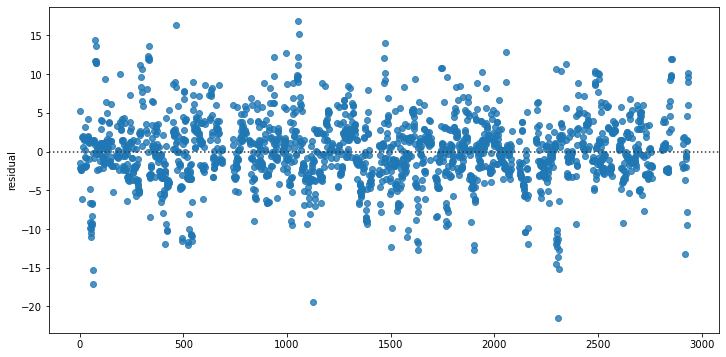

In [67]:
homoscedasticity(LinearRegression(),X_train,y_train)

By looking at the plot, we see that the redisuals are somehow constant between the error terms. Thus, the condition of homoscedasticy is met.

In [68]:
table()

,model,train_score,test_score,mses
0,LinearRegression(no_tunning),0.804745,0.812918,17.326209
1,LinearRegression (2 degree),0.926290,0.907635,8.554153


We might see some overfitting in LinearRegression with 02-degree polynomial. Yet, we do not fix it for now since other models can have better train_score.

## Other models
### Decision Tree

In [69]:
param = {"max_depth":[3,4,5,6],
        "max_features": range(5,13)}

grid = GridSearchCV(DecisionTreeRegressor(random_state=5), param_grid=param, n_jobs=-1,)
grid.fit(X_train,y_train)

dt_best_param = grid.best_params_
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

Best parameters: {'max_depth': 6, 'max_features': 12}
Best cross-validation score: 0.91



In [70]:
dt = DecisionTreeRegressor(max_depth=dt_best_param["max_depth"], max_features=dt_best_param["max_features"],random_state=5)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
train_score=dt.score(X_train,y_train)
test_score=dt.score(X_test,y_test)

result_regression.append({"model": "dt(max_depth=6, max_feature=12)", "train_score": train_score, 
                          "test_score": test_score, "mses":mean_squared_error(y_test,y_pred)})

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
param = {"n_estimators":range(20,160,10),
        "max_depth":[3,4,5,6]}

grid = GridSearchCV(RandomForestRegressor(random_state=5), param_grid=param, n_jobs=-1,)
grid.fit(X_train,y_train)

rf_best_param = grid.best_params_
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

Best parameters: {'max_depth': 6, 'n_estimators': 120}
Best cross-validation score: 0.94



In [73]:
rf = RandomForestRegressor(n_estimators=rf_best_param["n_estimators"], max_depth=rf_best_param["max_depth"], random_state=5)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
train_score=rf.score(X_train,y_train)
test_score=rf.score(X_test,y_test)

result_regression.append({"model": "RF(max_depth:6, estimators:120)", "train_score": train_score, 
                          "test_score": test_score, "mses":mean_squared_error(y_test,y_pred)})

In [74]:
table()

,model,train_score,test_score,mses
0,LinearRegression(no_tunning),0.804745,0.812918,17.326209
1,LinearRegression (2 degree),0.926290,0.907635,8.554153
2,"dt(max_depth=6, max_feature=12)",0.938786,0.916360,7.746113
3,"RF(max_depth:6, estimators:120)",0.960497,0.943311,5.250083


### XGBoost

In [75]:
from xgboost import XGBRegressor

param = {'n_estimators': [50,100],
        'max_depth': [i for i in range(1,6)],
        'learning_rate': [i for i in np.arange(0.1,2.1,0.1)]}

grid = GridSearchCV(XGBRegressor(random_state=5, n_job=-1), param_grid=param, n_jobs=-1,)
grid.fit(X_train,y_train)

xg_best_param = grid.best_params_
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}\n")

[08:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_job } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation score: 0.96



In [76]:
xg = XGBRegressor(n_estimators=xg_best_param["n_estimators"], max_depth=xg_best_param["max_depth"],
                  learning_rate=xg_best_param["learning_rate"], random_state=5)
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)
train_score=xg.score(X_train,y_train)
test_score=xg.score(X_test,y_test)

result_regression.append({"model": "XGBoost", "train_score": train_score, 
                          "test_score": test_score, "mses":mean_squared_error(y_test,y_pred)})

In [77]:
table()

,model,train_score,test_score,mses
0,LinearRegression(no_tunning),0.804745,0.812918,17.326209
1,LinearRegression (2 degree),0.926290,0.907635,8.554153
2,"dt(max_depth=6, max_feature=12)",0.938786,0.916360,7.746113
3,"RF(max_depth:6, estimators:120)",0.960497,0.943311,5.250083
4,XGBoost,0.993509,0.957938,3.895467


## Tune and understand the best models

In [78]:
xg_best_param

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

In [79]:
xg = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=45)
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)
train_score=xg.score(X_train,y_train)
test_score=xg.score(X_test,y_test)

result_regression.append({"model": "XGBoost(reduced overfit)", "train_score": train_score, 
                          "test_score": test_score, "mses":mean_squared_error(y_test,y_pred)})

print(f"train score: {train_score}")
print(f"test score: {test_score}")

train score: 0.9484633553151961
test score: 0.9233922641626234


## Regression Conclusion

In [80]:
table()

,model,train_score,test_score,mses
0,LinearRegression(no_tunning),0.804745,0.812918,17.326209
1,LinearRegression (2 degree),0.926290,0.907635,8.554153
2,"dt(max_depth=6, max_feature=12)",0.938786,0.916360,7.746113
3,"RF(max_depth:6, estimators:120)",0.960497,0.943311,5.250083
4,XGBoost,0.993509,0.957938,3.895467
5,XGBoost(reduced overfit),0.948463,0.923392,7.094852


# Classification

For classification, the target column will be divided to 3 groups: low (0), medium (1), and high (2).
- Low life expectancy has value below 63
- Medium life expectancy has value between 63 and 75
- High life expectancy has value above 75

In [81]:
y = y.apply(lambda x: 0 if x<63 else 1 if x<75 else 2).values

## Imbalance handle

In [82]:
from imblearn.over_sampling import SMOTE

X_smote,y_smote = SMOTE().fit_sample(X_selected,y)

## Splitting data and model implementation

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.8, random_state=5)

In [84]:
result = []

## SVC

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

param = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(random_state=5), param_grid=param, cv=5, scoring="f1_macro", n_jobs=-1)
grid.fit(X_train, y_train)

svc_best_param = grid.best_params_
print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation f1 score: {grid.best_score_:.2f}\n")

Best params:
{'C': 10, 'gamma': 0.1}

Best cross-validation f1 score: 0.91



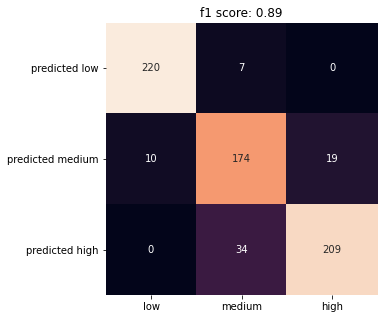

In [86]:
svc = SVC(C=svc_best_param["C"], gamma=svc_best_param["gamma"], random_state=5)
svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),square=True,annot=True,cbar=False, fmt=".0f",
            xticklabels=["low", "medium", "high"],
           yticklabels=["predicted low", "predicted medium", "predicted high"])
plt.title(f"f1 score: {f1_score(y_test, y_pred, average='macro'):.2f}")
plt.show()


result.append({"classifier":"SVC","accuracy":np.round(accuracy_score(y_test, y_pred),2)})

## Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

param = {'max_depth': [i for i in range(1,10)],
        'max_features': [i for i in range(1,X_train.shape[1])]}

grid = GridSearchCV(DecisionTreeClassifier(random_state=5), param_grid=param, cv=5, scoring="f1_macro", n_jobs=-1)
grid.fit(X_train, y_train)
dt_best_param = grid.best_params_
print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation f1 score: {grid.best_score_:.2f}\n")

Best params:
{'max_depth': 9, 'max_features': 9}

Best cross-validation f1 score: 0.92



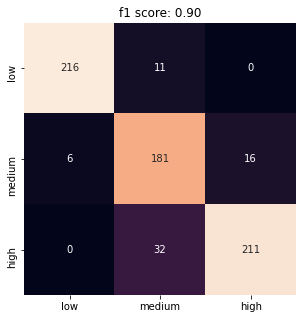

In [88]:
dt = DecisionTreeClassifier(max_depth=dt_best_param["max_depth"], max_features=dt_best_param["max_features"],
                            random_state=5)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),square=True,annot=True,cbar=False, fmt=".0f",
            xticklabels=["low", "medium", "high"],
           yticklabels=["low", "medium", "high"])
plt.title(f"f1 score: {f1_score(y_test, y_pred, average='macro'):.2f}")
plt.show()

result.append({"classifier":"DecisionTree","accuracy":np.round(accuracy_score(y_test, y_pred),2)})

In [89]:
def plot_feature_importance(model,x,name):
    n_feature=x.shape[1]
    plt.barh(range(n_feature),model.feature_importances_)
    plt.yticks(np.arange(n_feature),name)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")

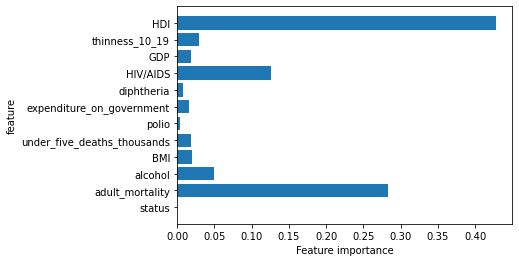

In [90]:
plot_feature_importance(dt,X_train,X.drop("measles_case", axis=1).columns)

Despite of removing feature before fitting, for decision tree classification, only 3 features have high impact on life expectancy: HDI, HIV/AIDS, and adult mortality.
## Ensemble Learning
### Bagging with SVC

In [91]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(SVC(kernel="rbf", C=svc_best_param["C"], gamma=svc_best_param["gamma"],probability=True), 
                            n_jobs=-1, random_state=5, oob_score=True, bootstrap=True)

param = {'n_estimators': [i for i in range(10,101,20)],
        'max_features': [i for i in range(1,X_train.shape[1])]}

grid = GridSearchCV(bag_clf, param_grid=param, cv=5, scoring="f1_macro", n_jobs=-1)
grid.fit(X_train, y_train)

bagging_best_param = grid.best_params_

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation f1 score: {grid.best_score_:.2f}\n")

Best params:
{'max_features': 9, 'n_estimators': 70}

Best cross-validation f1 score: 0.92



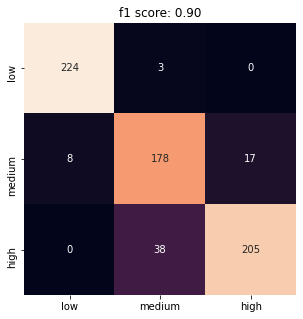

In [92]:
bag_clf = BaggingClassifier(SVC(kernel="rbf", C=svc_best_param["C"], gamma=svc_best_param["gamma"],probability=True), 
                            n_estimators=bagging_best_param["n_estimators"], max_features=bagging_best_param["max_features"],
                            n_jobs=-1, random_state=5, oob_score=True, bootstrap=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),square=True,annot=True,cbar=False, fmt=".0f",
            xticklabels=["low", "medium", "high"],
           yticklabels=["low", "medium", "high"])
plt.title(f"f1 score: {f1_score(y_test, y_pred, average='macro'):.2f}")
plt.show()

result.append({"classifier":"SVC Bagging","accuracy":np.round(accuracy_score(y_test, y_pred),2)})

### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

param = {'n_estimators': [100,200,300],
        'max_depth': [i for i in range(1,10)],
        'max_features': [i for i in range(1,X_train.shape[1])]}

grid = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=5), 
                    param_grid=param, n_jobs=-1, scoring="f1_macro", cv=5)
grid.fit(X_train, y_train)

rf_best_param = grid.best_params_

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation f1 score: {grid.best_score_:.2f}\n")

Best params:
{'max_depth': 9, 'max_features': 3, 'n_estimators': 100}

Best cross-validation f1 score: 0.94



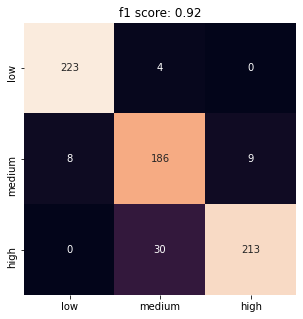

In [94]:
rf = RandomForestClassifier(max_depth=rf_best_param["max_depth"], max_features=rf_best_param["max_features"], 
                            n_estimators=rf_best_param['n_estimators'], n_jobs=-1, random_state=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),square=True,annot=True,cbar=False, fmt=".0f",
            xticklabels=["low", "medium", "high"],
           yticklabels=["low", "medium", "high"])
plt.title(f"f1 score: {f1_score(y_test, y_pred, average='macro'):.2f}")
plt.show()
result.append({"classifier":"Random Forest","accuracy":np.round(accuracy_score(y_test, y_pred),2)})

### XGBoost

In [95]:
from xgboost import XGBClassifier

param = {'n_estimators': [50,100],
        'max_depth': [i for i in range(1,6)],
        'learning_rate': [i for i in np.arange(0.1,2.1,0.1)]
        }

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, n_jobs=-1, random_state=5), 
                    param_grid=param, n_jobs=-1, scoring='f1_macro', cv=5)
grid.fit(X_train, y_train)
xgb_best_param = grid.best_params_

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation f1 score: {grid.best_score_:.2f}\n")

[08:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params:
{'learning_rate': 0.7000000000000001, 'max_depth': 4, 'n_estimators': 50}

Best cross-validation f1 score: 0.95



[08:48:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


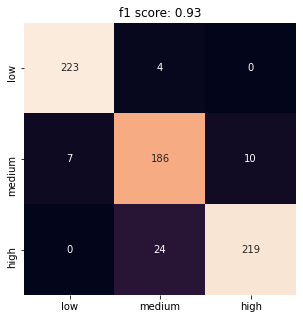

In [96]:
xg = XGBClassifier(learning_rate=xgb_best_param["learning_rate"], 
                   max_depth=xgb_best_param["max_depth"],
                   n_estimators=xgb_best_param["n_estimators"],
                   use_label_encoder=False, n_jobs=-1, random_state=5)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),square=True,annot=True,cbar=False, fmt=".0f",
            xticklabels=["low", "medium", "high"],
           yticklabels=["low", "medium", "high"])
plt.title(f"f1 score: {f1_score(y_test, y_pred, average='macro'):.2f}")
plt.show()

result.append({"classifier":"XGBoost","accuracy":np.round(accuracy_score(y_test, y_pred),2)})

### AdaBoost

In [97]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=dt_best_param["max_depth"], max_features=dt_best_param["max_features"], random_state=5)
ada_clf = AdaBoostClassifier(base_estimator=dt, random_state=5)

param = {'n_estimators': [50,100,200],
        'learning_rate': [i for i in np.arange(0.1,2.1,0.1)]}

grid = GridSearchCV(ada_clf, param_grid=param, n_jobs=-1, scoring="f1_macro", cv=5)
grid.fit(X_train, y_train)
ada_best_param = grid.best_params_

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation f1 score: {grid.best_score_:.2f}\n")

Best params:
{'learning_rate': 1.4000000000000001, 'n_estimators': 100}

Best cross-validation f1 score: 0.95



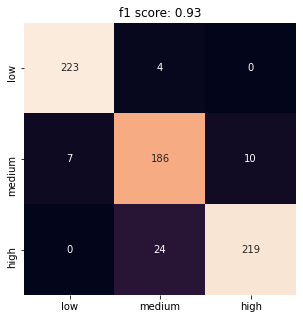

In [98]:
ada_clf = AdaBoostClassifier(base_estimator=dt,learning_rate=ada_best_param["learning_rate"], 
                             n_estimators=ada_best_param["n_estimators"], random_state=5)
ada_clf.fit(X_train, y_train)
y_pred = xg.predict(X_test)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),square=True,annot=True,cbar=False, fmt=".0f",
            xticklabels=["low", "medium", "high"],
           yticklabels=["low", "medium", "high"])
plt.title(f"f1 score: {f1_score(y_test, y_pred, average='macro'):.2f}")
plt.show()

result.append({"classifier":"AdaBoost","accuracy":np.round(accuracy_score(y_test, y_pred),2)})

## Classification conclusion

In [99]:
df_result = pd.DataFrame(result)
df_result.sort_values("accuracy", ascending=False)

,classifier,accuracy
4,XGBoost,0.93
5,AdaBoost,0.93
3,Random Forest,0.92
0,SVC,0.90
1,DecisionTree,0.90
2,SVC Bagging,0.90


# Unsupervised Learning
## Visualization with dimension reduction technique

In [100]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=5, n_jobs=-1)
X_tsne = tsne.fit_transform(X_selected)

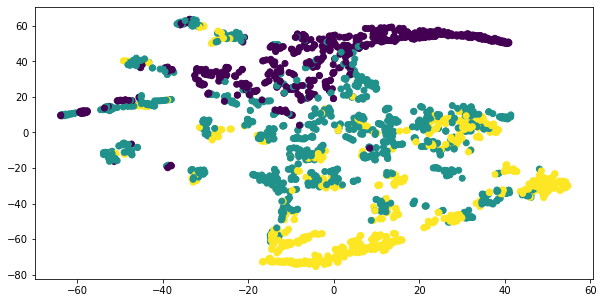

In [101]:
plt.figure(figsize=(10,5))

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)

Based on the plot, there are 2 clusters are anisotropic, therefore, kmeans algorithm is not suitable to be used. Furthermore, the density of area between each cluster is similar, dbscan might be not working well, too. Gaussian Mixture and Bayesian Gaussian Mixture are used since the shape of clusters is ellipsoid.

## Gaussian Mixture
### Find best k and covariance

Since each component has its own diagonal covariance matrix, 'diag' could be the right type of covariance.

In [102]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics.cluster import silhouette_score

In [103]:
min_bic=np.infty
for i in range(1,10):
    for c in ("full","tied","spherical","diag"):
        bic=GaussianMixture(n_components=i,n_init=10,covariance_type=c,
                           random_state=5).fit(X_selected).bic(X_selected)
        
        if bic<min_bic:
            min_bic=bic
            best_k=i
            best_cov=c

In [104]:
print(f"best covariance: {best_cov}")

best covariance: diag


In [105]:
n_components = np.arange(2, 10)
sil_score = []
bic = []
aic = []
for i in range(2,10):
    gm = GaussianMixture(n_components=i,n_init=10,covariance_type='diag', random_state=5).fit(X_selected)
    sil_score.append(silhouette_score(X_selected, gm.predict(X_selected)))
    bic.append(gm.bic(X_selected))
    aic.append(gm.aic(X_selected))   

Text(0.5, 1.0, 'BIC & AIC')

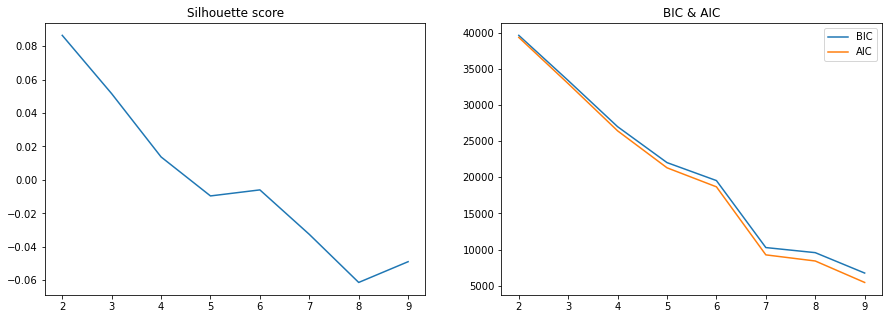

In [106]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(n_components, sil_score)
plt.title("Silhouette score")

plt.subplot(122)
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, aic, label='AIC')
plt.legend(loc="best")
plt.title('BIC & AIC')

Since Silhouette decrease further with increased number of component. We will choose number of component of 3 and 4 to test out which one is better.
### Initializing with best params

In [107]:
label = []
for i in range(3,5):
    gm = GaussianMixture(n_components=i,covariance_type='diag', random_state=5, n_init=10)
    label.append(gm.fit_predict(X_selected))    

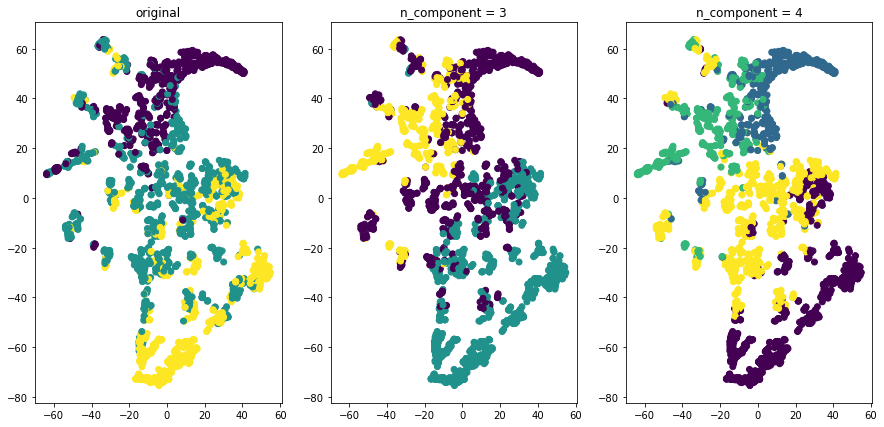

In [108]:
plt.figure(figsize=(15,7))

plt.subplot(131)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.title("original")

for i, l in enumerate(label):
    plt.subplot(131+i+1)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=l)
    plt.title(f"n_component = {i+3}")  

### Checking with model implementation

In [109]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression


log_result = []
for i, l in enumerate(label):
    strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
    for train_index, test_index in strat.split(X_selected, l):
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = l[train_index], l[test_index]
    
    logreg = LogisticRegression(random_state=5, n_jobs=-1)
    logreg.fit(X_train, y_train)
    
    
    log_result.append({"n_component":i+3,
                       "train_score":np.round(logreg.score(X_train, y_train),2),
                      "test_score":np.round(logreg.score(X_test, y_test),2)})

In [110]:
pd.DataFrame(log_result)

,n_component,train_score,test_score
0,3,0.94,0.95
1,4,0.94,0.93


The generalization of classification model is quite good.

## Bayesian Gaussian Mixture

In [111]:
bgm = BayesianGaussianMixture(n_components=10, random_state=5, n_init=10).fit(X_selected)

In [112]:
print(np.round(bgm.weights_,2))
print(np.sum(np.round(bgm.weights_,2)>0))

[0.31 0.02 0.01 0.11 0.22 0.02 0.01 0.16 0.14 0.01]
10


In [113]:
label_bgm = bgm.predict(X_selected)
np.unique(label_bgm, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([768,  50,  16, 256, 533,  46,  14, 394, 358,  23], dtype=int64))

Text(0.5, 1.0, 'Bayesian Gaussian Mixture')

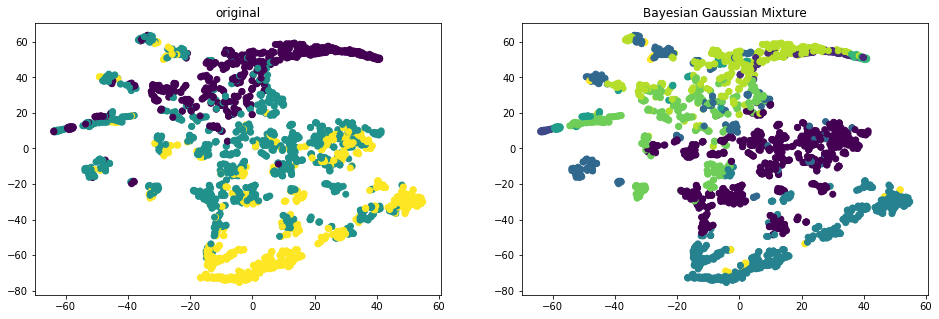

In [114]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.title("original")

plt.subplot(122)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=label_bgm)
plt.title("Bayesian Gaussian Mixture")

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
log_result2 = []

for i in range(2,6):
    bgm = BayesianGaussianMixture(n_components=i, random_state=5, n_init=10).fit(X_selected)
    bgm_labels = bgm.predict(X_selected)
    
    strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
    for train_index, test_index in strat.split(X_selected, bgm_labels):
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = bgm_labels[train_index], bgm_labels[test_index]
        
    
    lr = LogisticRegression(max_iter=2000, random_state=5)
    cv = cross_val_score(lr,X_train,y_train,cv=5)
    meancv = cv.mean()
    lr.fit(X_train,y_train)
    log_result2.append({"n_component":i,
                        "mean cv": np.round(meancv, 2),
                        "train_score":np.round(lr.score(X_train, y_train),2),
                        "test_score":np.round(lr.score(X_test, y_test),2)})

In [117]:
pd.DataFrame(log_result2)

,n_component,mean cv,train_score,test_score
0,2,0.96,0.97,0.97
1,3,0.93,0.94,0.91
2,4,0.90,0.91,0.88
3,5,0.94,0.94,0.91


# Semi supervised learning
## Limited labeled data

In [118]:
strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
for train_index, test_index in strat.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [119]:
labeled_data = 50
np.random.seed(5)
labeled = np.random.randint(X_train.shape[0], size=labeled_data)

In [120]:
log_reg=LogisticRegression(multi_class="ovr",random_state=5,max_iter=1000)
log_reg.fit(X_train[labeled],y_train[labeled])

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=5)

In [121]:
log_reg.score(X_test,y_test)

0.7317073170731707

## Representative
To decide which data point is representative for their cluster, we use the probability of each data point. The threshold is nearly 1 (0.99999999) which indicates that this point almost certainly belongs to the right cluster.

In [122]:
gm = GaussianMixture(n_components=4,covariance_type='diag', random_state=5, n_init=10)
target = gm.fit_predict(X_train)

In [123]:
target_prob = gm.predict_proba(X_train)

In [124]:
s = 0
for i in range(4):
    clus = target_prob[target==i][:,i]
    print(i, clus[clus>0.99999999].shape)
    s += clus[clus>0.99999999].shape[0]
print(f"Total representative: {s}")

0 (16,)
1 (405,)
2 (143,)
3 (48,)
Total representative: 612


In [125]:
mask = (target_prob[:,0]>0.99999999)|(target_prob[:,1]>0.99999999)|(target_prob[:,2]>0.99999999)|(target_prob[:,3]>0.99999999)

In [126]:
X_representative = X_train[mask]
y_representative = y_train[mask]

In [127]:
log_reg=LogisticRegression(multi_class="ovr",random_state=5,max_iter=1000)
log_reg.fit(X_representative,y_representative)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=5)

In [128]:
log_reg.score(X_test, y_test)

0.7642276422764228

In [129]:
gm = GaussianMixture(n_components=4,covariance_type='diag', random_state=5, n_init=10)
target = gm.fit_predict(X_selected)

In [130]:
test = pd.DataFrame(X_selected[target==0], columns=X.drop("measles_case", axis=1).columns)
test1 = pd.DataFrame(X_selected[target==1], columns=X.drop("measles_case", axis=1).columns)
test2 = pd.DataFrame(X_selected[target==2], columns=X.drop("measles_case", axis=1).columns)
test3 = pd.DataFrame(X_selected[target==3], columns=X.drop("measles_case", axis=1).columns)

In [131]:
test.describe()

,status,adult_mortality,alcohol,BMI,under_five_deaths_thousands,polio,expenditure_on_government,diphtheria,HIV/AIDS,GDP,thinness_10_19,HDI
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.0,723.000000,723.000000,723.000000
mean,0.619640,-0.354224,0.679064,0.228755,-0.093211,0.061003,0.354821,0.041417,0.0,3.161508,-0.291362,0.508943
std,0.485811,0.314954,0.553043,0.436041,0.049584,0.463626,0.846083,0.598599,0.0,3.705065,0.223311,0.198352
min,0.000000,-0.884553,-0.591454,-1.100744,-0.130435,-4.421053,-1.444444,-4.666667,0.0,-0.311768,-0.545455,0.057872
25%,0.000000,-0.494309,0.395802,0.263692,-0.130435,0.000000,-0.028189,0.000000,0.0,0.337623,-0.454545,0.354043
50%,1.000000,-0.390244,0.790855,0.362407,-0.130435,0.157895,0.518519,0.166667,0.0,1.771828,-0.363636,0.527660
75%,1.000000,-0.250407,1.086207,0.450304,-0.086957,0.263158,0.946296,0.277778,0.0,5.546444,-0.200000,0.672340
max,1.000000,0.689431,2.086207,0.746450,0.086957,0.315789,1.910494,0.333333,0.0,20.425794,0.672727,0.891915


In [132]:
test1.describe()

,status,adult_mortality,alcohol,BMI,under_five_deaths_thousands,polio,expenditure_on_government,diphtheria,HIV/AIDS,GDP,thinness_10_19,HDI
count,433.0,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,0.0,1.043444,0.053841,-0.474704,1.672758,-0.956971,0.100761,-0.991532,12.353679,0.016183,0.530170,-0.597254
std,0.0,1.127659,0.422818,0.350765,2.115102,1.242513,0.724484,1.324538,14.915686,0.504241,0.536262,0.422358
min,0.0,-0.871545,-0.591454,-1.127789,-0.130435,-4.736842,-1.419753,-5.000000,0.000000,-0.312918,-0.418182,-2.335319
25%,0.0,0.253659,-0.348576,-0.705882,0.043478,-1.263158,-0.410494,-1.222222,2.285714,-0.262297,0.090909,-0.881702
50%,0.0,1.001626,0.079010,-0.508452,0.913043,-0.631579,0.009259,-0.611111,6.857143,-0.193595,0.600000,-0.650213
75%,0.0,1.795122,0.365067,-0.246112,2.826087,-0.052632,0.530864,-0.055556,15.714286,0.124373,0.872727,-0.231489
max,0.0,3.811382,1.189655,0.351589,13.260870,0.315789,2.657407,0.333333,72.142857,3.643964,2.363636,0.251915


In [133]:
test2.describe()

,status,adult_mortality,alcohol,BMI,under_five_deaths_thousands,polio,expenditure_on_government,diphtheria,HIV/AIDS,GDP,thinness_10_19,HDI
count,441.0,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,0.0,0.484339,-0.383395,-0.720098,7.840875,-1.539393,-0.359661,-1.632725,1.973761,-0.221339,1.242507,-0.929207
std,0.0,0.741508,0.308952,0.150528,16.247199,1.457455,0.531699,1.555283,2.197529,0.086853,1.111727,0.575400
min,0.0,-0.878049,-0.591454,-1.146721,-0.130435,-4.736842,-1.669753,-5.055556,0.000000,-0.313612,-0.563636,-2.335319
25%,0.0,0.091057,-0.583958,-0.789723,0.782609,-2.315789,-0.746914,-2.500000,0.142857,-0.281985,0.709091,-1.102979
50%,0.0,0.624390,-0.517991,-0.713996,2.565217,-1.105263,-0.385802,-1.166667,1.142857,-0.240414,1.072727,-0.820426
75%,0.0,0.962602,-0.338081,-0.613928,5.173913,-0.421053,-0.018519,-0.388889,3.142857,-0.188747,1.727273,-0.605957
max,0.0,2.965854,0.870315,-0.275862,108.565217,0.315789,1.296296,0.333333,7.571429,0.246765,4.436364,0.166809


In [134]:
test3.describe()

,status,adult_mortality,alcohol,BMI,under_five_deaths_thousands,polio,expenditure_on_government,diphtheria,HIV/AIDS,GDP,thinness_10_19,HDI
count,861.0,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,0.0,-0.033993,-0.118811,-0.004228,0.205625,-0.327049,-0.080884,-0.335269,0.097063,0.312716,0.140344,-0.160067
std,0.0,0.460920,0.434770,0.483812,0.487050,1.109278,0.572629,1.151681,0.188134,0.703430,0.543385,0.651925
min,0.0,-0.884553,-0.591454,-1.127789,-0.130435,-4.578947,-1.444444,-4.888889,0.000000,-0.312447,-0.581818,-2.335319
25%,0.0,-0.279675,-0.508996,-0.213658,-0.130435,-0.421053,-0.481481,-0.388889,0.000000,-0.193052,-0.236364,-0.231489
50%,0.0,0.006504,-0.237631,0.108181,0.000000,0.105263,-0.117284,0.111111,0.000000,0.093113,0.000000,0.023830
75%,0.0,0.273171,0.141679,0.311021,0.347826,0.263158,0.253086,0.277778,0.142857,0.499451,0.472727,0.173617
max,0.0,1.235772,1.538981,0.914131,2.565217,0.315789,2.453704,0.333333,1.142857,4.904626,2.363636,0.605957
